In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as ts
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

In [2]:
#reading Dataset
cntry = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
#details of cntry data frame
print(cntry.info())
print('\n')
print(cntry.describe())
print('\n')
print(cntry.shape)
print('\n')
print(cntry.columns)
#column-wise null percentages here
print(round(100*(cntry.isnull().sum()/len(cntry.index)),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.3

Data Cleaning Starts 

In [4]:
cntry.country=cntry.country.str.upper()

In [5]:
# make sure that number of duplicate rows are zero
cntry.drop_duplicates( inplace=True)

In [6]:
cntry.shape

(167, 10)

EDA Starts

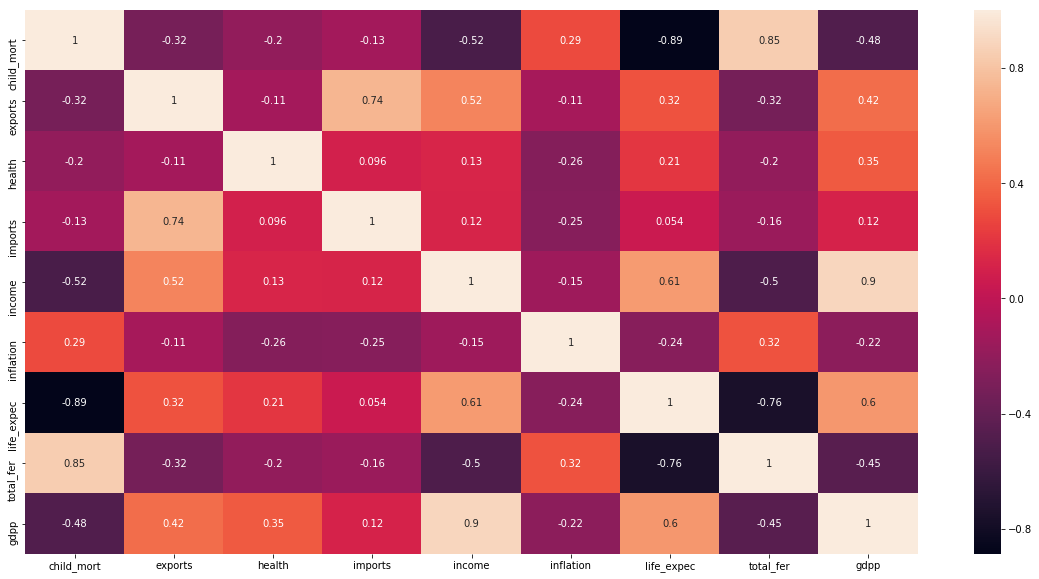

In [7]:
#Heat Map for Correlation 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(cntry.corr(),annot = True)

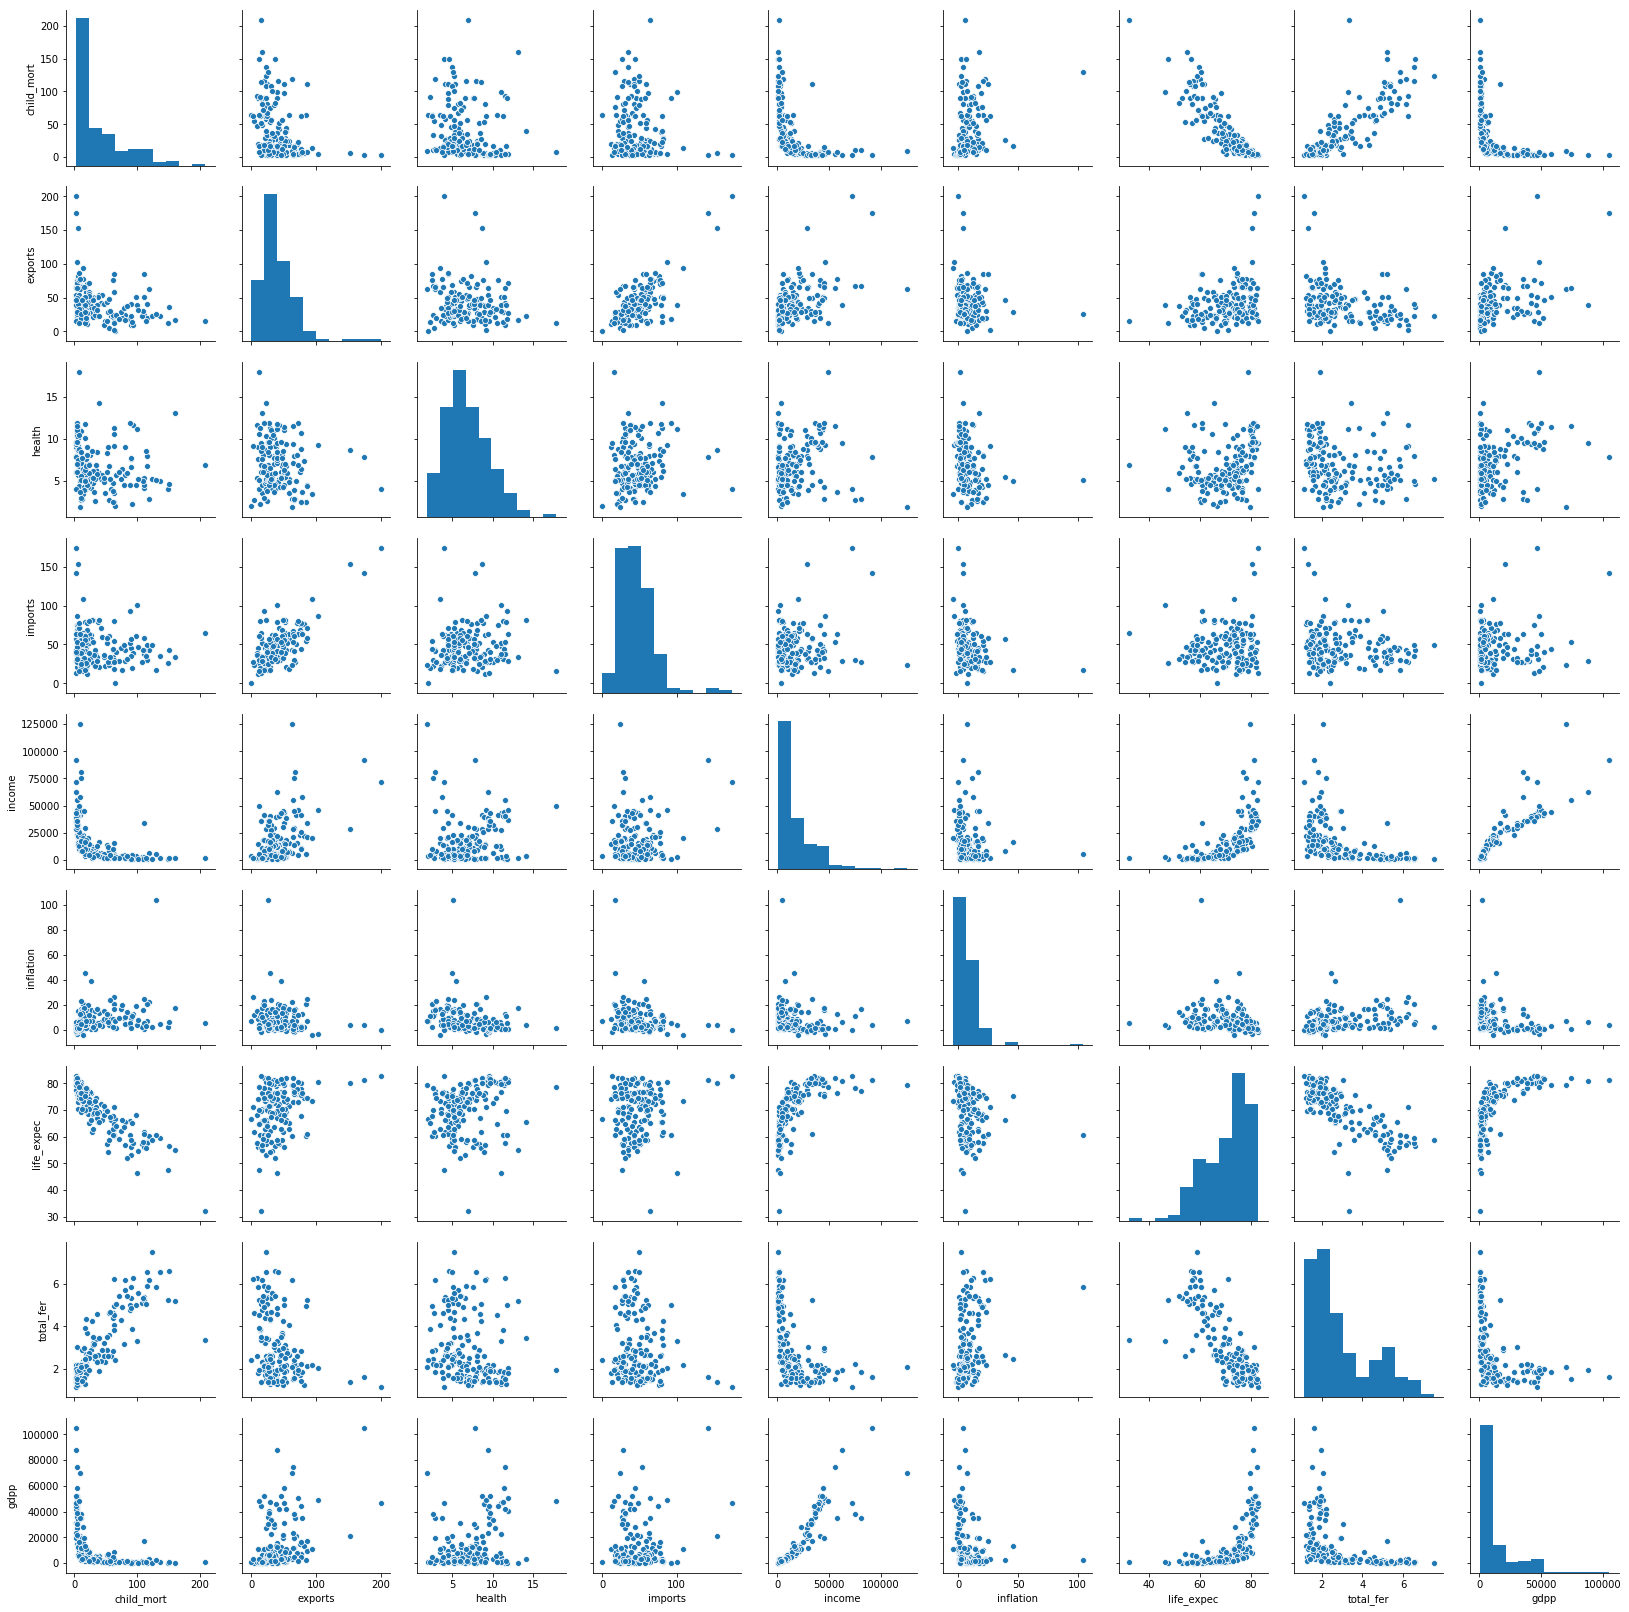

In [8]:
sns.pairplot(cntry)

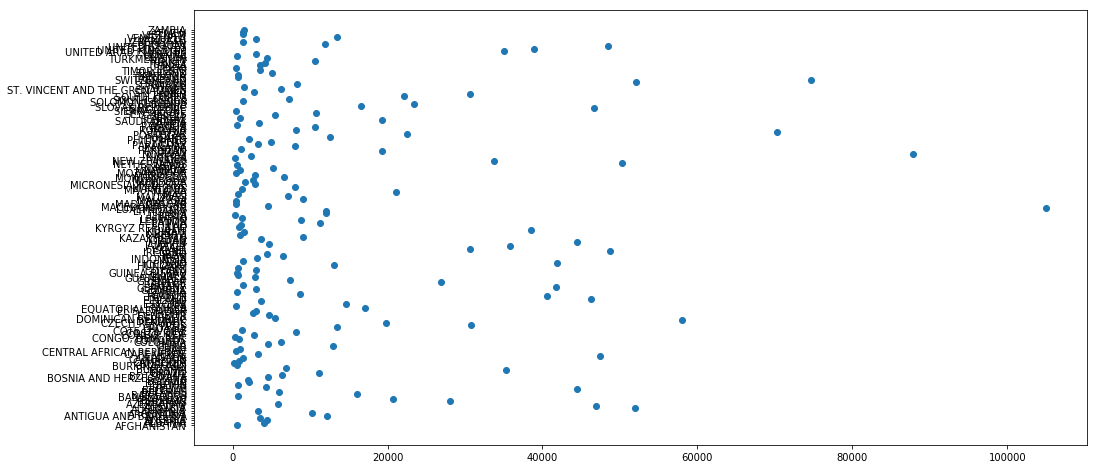

In [9]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'gdpp', y = 'country', data = cntry)
plt.show()

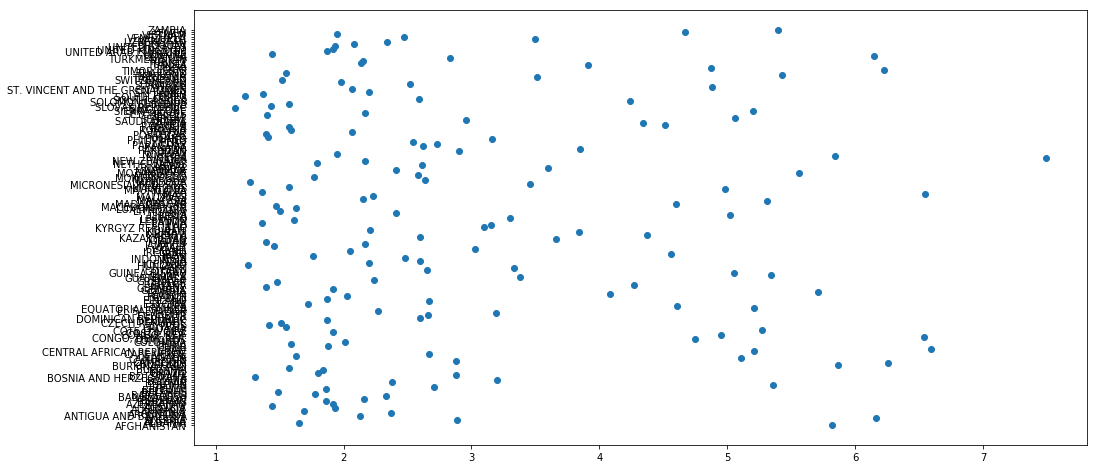

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'total_fer', y = 'country', data = cntry)
plt.show()

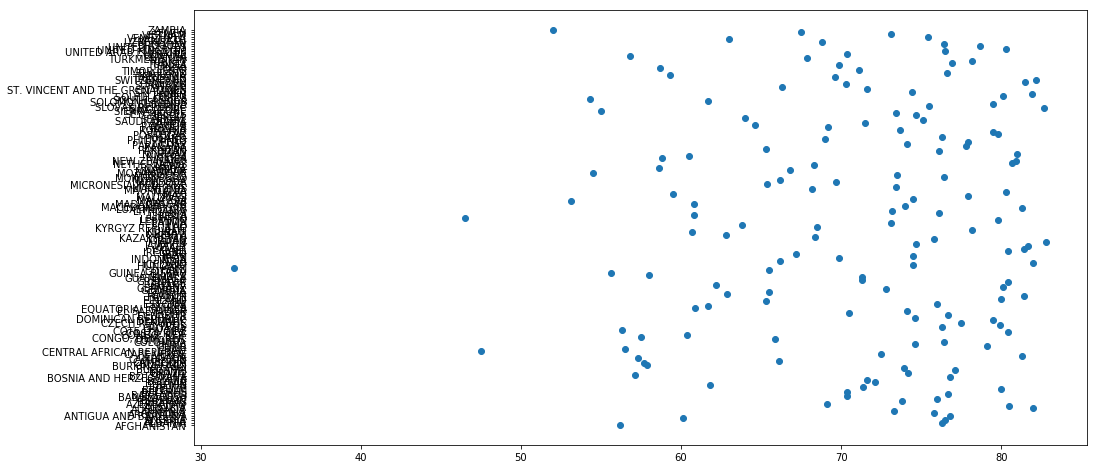

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'life_expec', y = 'country', data = cntry)
plt.show()

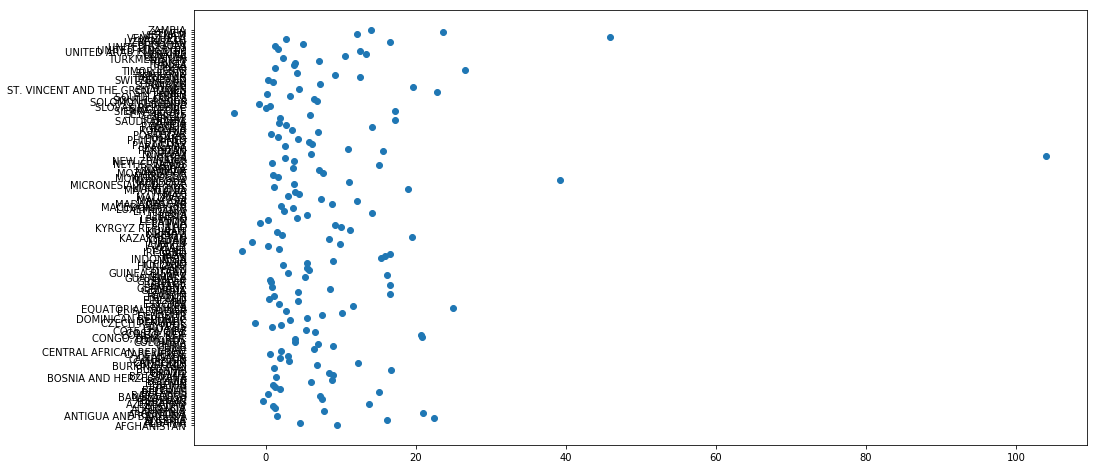

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'inflation', y = 'country', data = cntry)
plt.show()

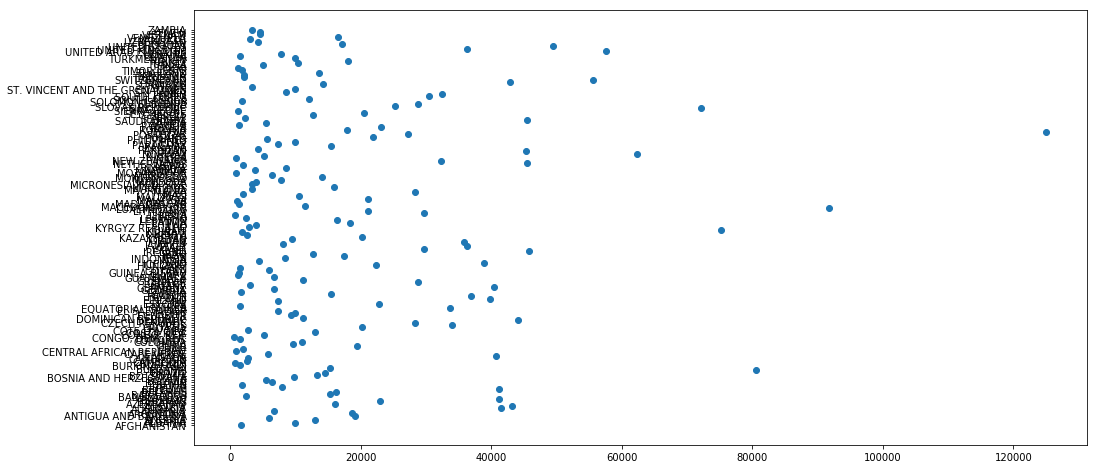

In [13]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'income', y = 'country', data = cntry)
plt.show()

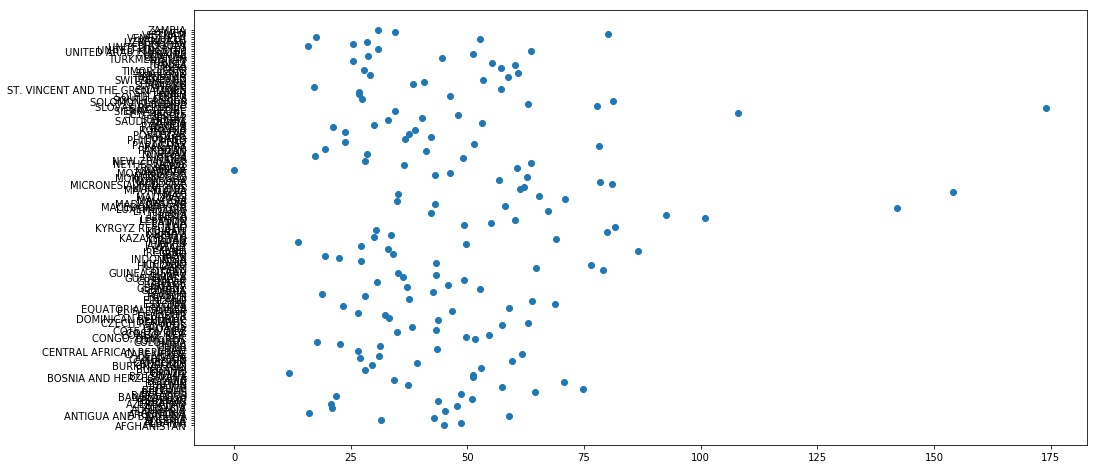

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'imports', y = 'country', data = cntry)
plt.show()

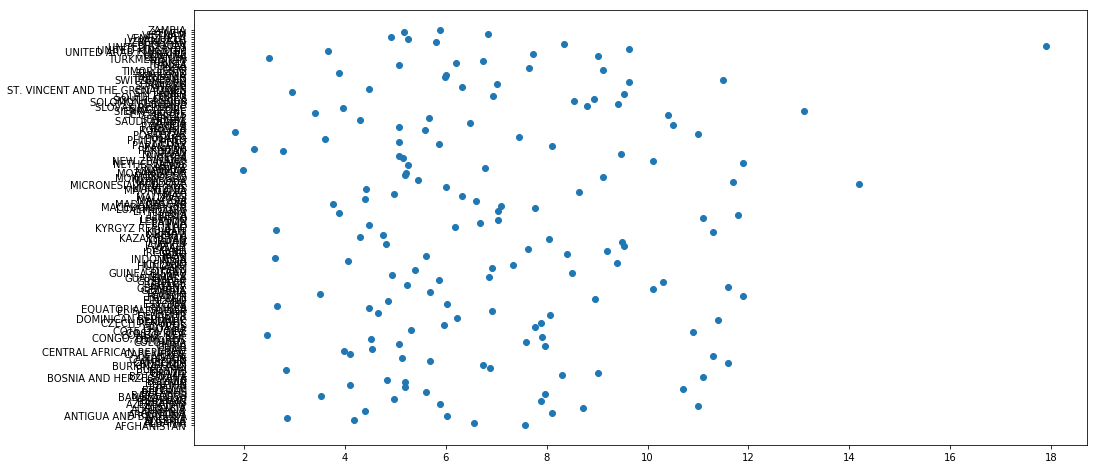

In [15]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'health', y = 'country', data = cntry)
plt.show()

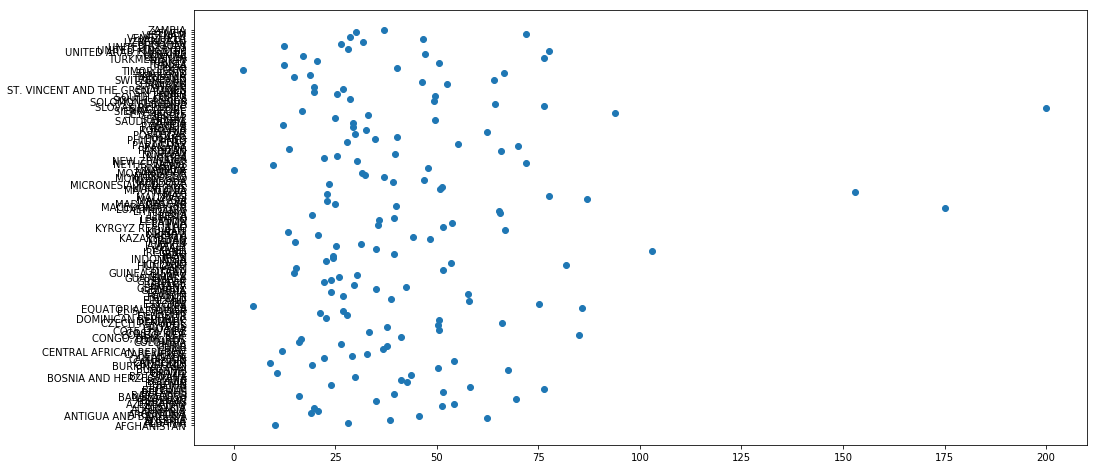

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'exports', y = 'country', data = cntry)
plt.show()

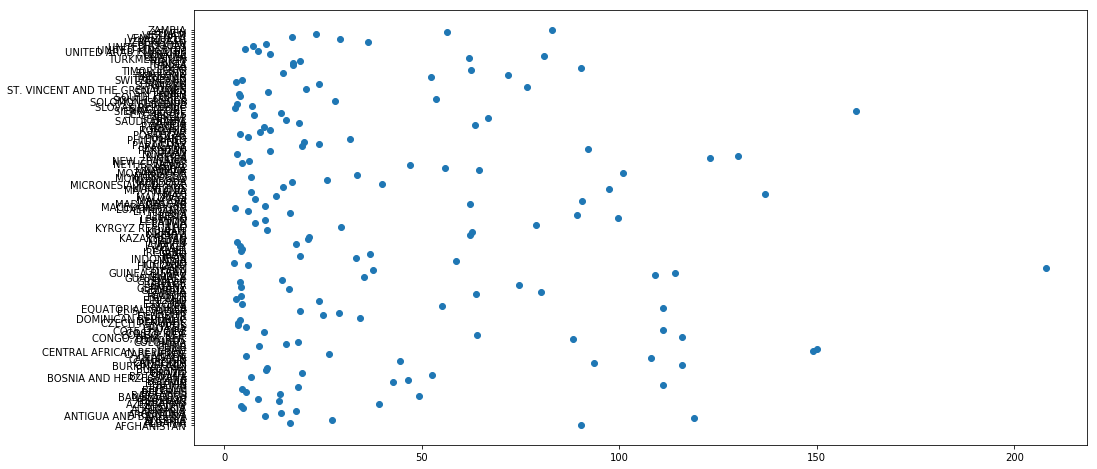

In [17]:
plt.figure(figsize=(16, 8))
plt.scatter(x = 'child_mort', y = 'country', data = cntry)
plt.show()

In [18]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
cntry.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


Standardize All Parameters

In [19]:
# standardise all parameters
cntry1 = cntry.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cntry1 = standard_scaler.fit_transform(cntry1)

In [20]:
cntry1 = pd.DataFrame(cntry1)
cntry1.columns = ['child_mort','exports','imports','income','inflation','life_expec','gdpp','total_fer','health']
cntry1.head()

,child_mort,exports,imports,income,inflation,life_expec,gdpp,total_fer,health
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## PCA Starts

In [21]:
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
pca.fit(cntry1)
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [23]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

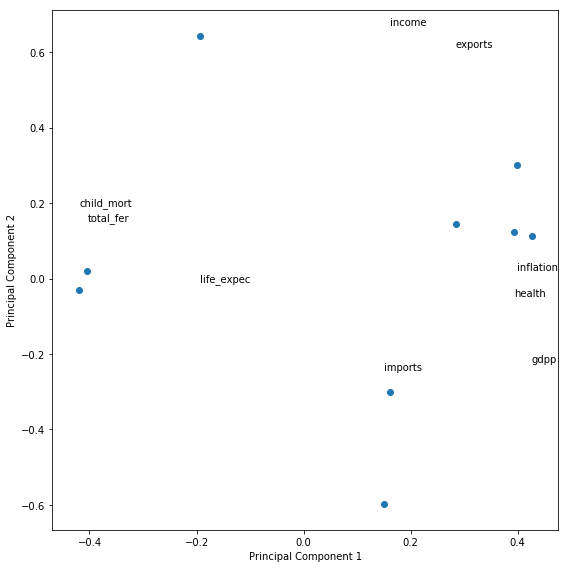

In [24]:
colnames = list(cntry1.columns)
pca_init =  pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':colnames})
pca_init.head()

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_init.PC1, pca_init.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_init.Feature):
    plt.annotate(txt, (pca_init.PC1[i],pca_init.PC2[i]))
plt.tight_layout()
plt.show()

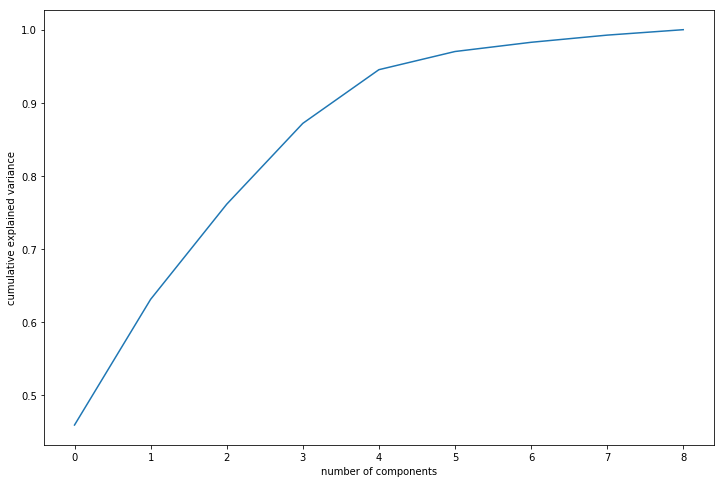

In [25]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## It is evident from the scree plot that 3 components describe 90 % of data so we are using 3 components 

In [26]:
pca_final=PCA(n_components=3) 

final_fit=pca_final.fit_transform(cntry1)
colnames = list(cntry1.columns)
final_pca =  pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'PC3':pca_final.components_[2],'Feature':colnames})
final_pca.head()

,PC1,PC2,PC3,Feature
0,-0.419519,0.192884,-0.029544,child_mort
1,0.283897,0.613163,0.144761,exports
2,0.150838,-0.243087,-0.596632,imports
3,0.161482,0.671821,-0.299927,income
4,0.398441,0.022536,0.301548,inflation


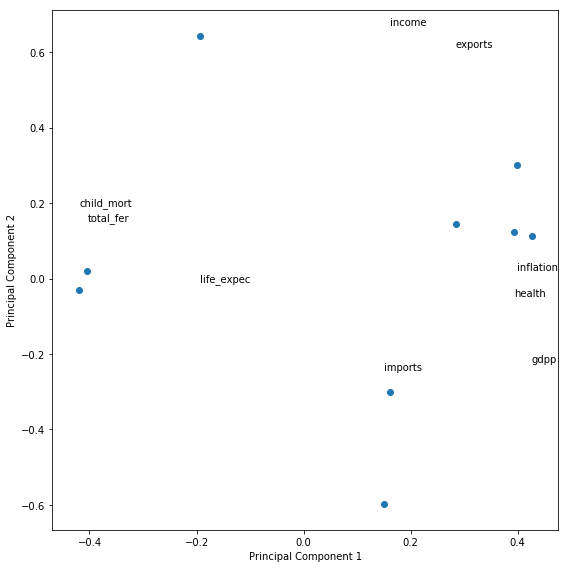

In [27]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(final_pca.PC1, final_pca.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(final_pca.Feature):
    plt.annotate(txt, (final_pca.PC1[i],final_pca.PC2[i]))
plt.tight_layout()
plt.show()

#### Creating correlation matrix for the principal components 

In [28]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(final_fit.transpose())

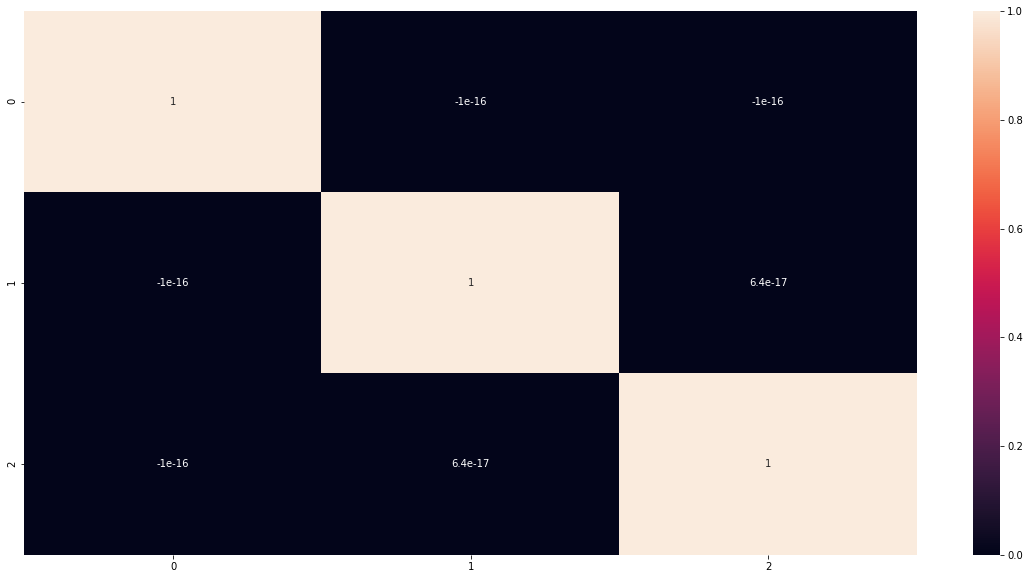

In [29]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [30]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 6.423099899881757e-17 , min corr:  -1.0402306762056132e-16


## We have chosen 3 components and we are moving towards clustering 

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(cntry1)

0.8618393389684584

## Starting the first Kmeans clustering

In [32]:
model_clus1 = KMeans(n_clusters = 2, max_iter=50)
model_clus1.fit(cntry1)
#For Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cntry1)
    sse_.append([k, silhouette_score(cntry1, kmeans.labels_)])

# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cntry1)
    ssd.append(model_clus.inertia_)

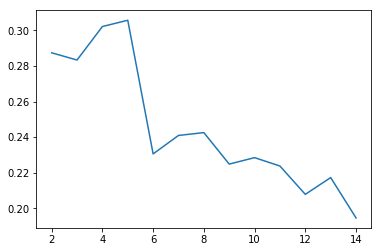

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

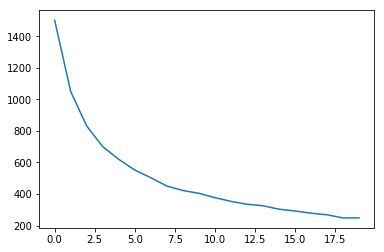

In [34]:
plt.plot(ssd)

In [35]:
# analysis of clusters formed
cntry.index = pd.RangeIndex(len(cntry.index))
cntry_km1 = pd.concat([cntry, pd.Series(model_clus1.labels_)], axis=1)


cntry_km1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

km_clusters_child_mort = 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_km1.groupby(["ClusterID"]).gdpp.mean())

In [36]:
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df.head()



,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,12.161616,48.603030,49.121212,26017.171717,5.503545,76.493939,20507.979798,1.941111,7.314040
1,1,76.280882,30.198515,43.642146,4227.397059,11.098750,61.910294,1981.235294,4.413824,6.090147
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50)
model_clus2.fit(cntry1)
#For Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cntry1)
    sse_.append([k, silhouette_score(cntry1, kmeans.labels_)])

# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cntry1)
    ssd.append(model_clus.inertia_)

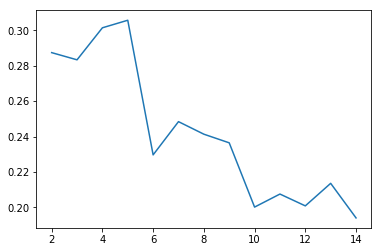

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

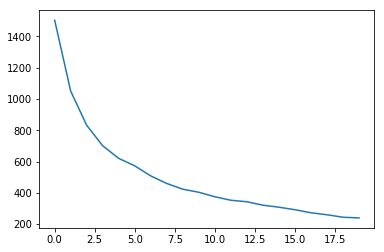

In [39]:
plt.plot(ssd)

In [40]:
# analysis of clusters formed
cntry.index = pd.RangeIndex(len(cntry.index))
cntry_km2 = pd.concat([cntry, pd.Series(model_clus2.labels_)], axis=1)


cntry_km2.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

km_clusters_child_mort = 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_km2.groupby(["ClusterID"]).gdpp.mean())
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df.head()



,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,21.927381,40.243917,47.473404,12305.595238,7.600905,72.814286,6486.452381,2.307500,6.200952
1,1,92.961702,29.151277,42.323404,3942.404255,12.019681,59.187234,1922.382979,5.008085,6.388511
2,2,5.000000,58.738889,51.491667,45672.222222,2.671250,80.127778,42494.444444,1.752778,8.807778
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
model_clus3 = KMeans(n_clusters = 4, max_iter=50)
model_clus3.fit(cntry1)
#For Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cntry1)
    sse_.append([k, silhouette_score(cntry1, kmeans.labels_)])

# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cntry1)
    ssd.append(model_clus.inertia_)

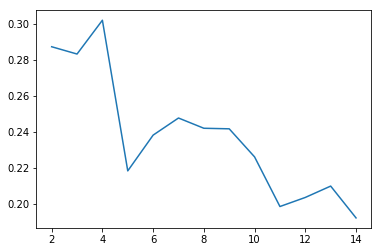

In [42]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

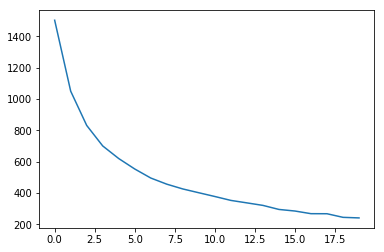

In [43]:
plt.plot(ssd)

In [44]:
# analysis of clusters formed
cntry.index = pd.RangeIndex(len(cntry.index))
cntry_km3 = pd.concat([cntry, pd.Series(model_clus3.labels_)], axis=1)


cntry_km3.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

km_clusters_child_mort = pd.DataFrame(cntry_km3.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_km3.groupby(["ClusterID"]).gdpp.mean())
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df.head()



,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,22.048837,41.103360,47.954255,12678.720930,7.624581,72.688372,6517.581395,2.307442,6.221512
1,1,5.181250,46.118750,40.584375,44021.875000,2.513844,80.081250,42118.750000,1.788438,9.088437
2,2,93.841304,28.837174,42.128261,3738.978261,12.087065,59.232609,1826.130435,5.054348,6.346957
3,3,4.133333,176.000000,156.666667,64033.333333,2.468000,81.433333,57566.666667,1.380000,6.793333
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
model_clus4 = KMeans(n_clusters = 5, max_iter=50)
model_clus4.fit(cntry1)
#For Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cntry1)
    sse_.append([k, silhouette_score(cntry1, kmeans.labels_)])

# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cntry1)
    ssd.append(model_clus.inertia_)

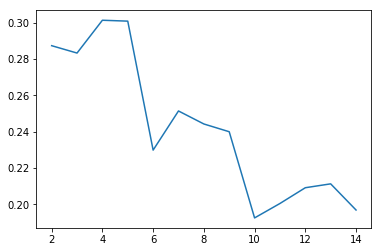

In [46]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

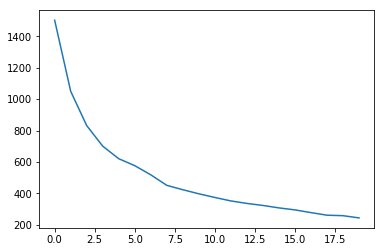

In [47]:
plt.plot(ssd)

In [48]:
# analysis of clusters formed
cntry.index = pd.RangeIndex(len(cntry.index))
cntry_km4 = pd.concat([cntry, pd.Series(model_clus4.labels_)], axis=1)


cntry_km4.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

km_clusters_child_mort = 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_km4.groupby(["ClusterID"]).gdpp.mean())
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df.head()



,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,4.953333,45.826667,39.736667,45250.000000,2.742200,80.376667,43333.333333,1.795333,9.168667
1,1,95.820455,27.941136,42.838636,3270.295455,11.881932,58.968182,1608.000000,5.087727,6.364773
2,2,28.441667,30.341361,29.343497,13300.833333,13.210833,72.372222,6355.722222,2.547500,5.325000
3,3,4.133333,176.000000,156.666667,64033.333333,2.468000,81.433333,57566.666667,1.380000,6.793333
4,4,18.335185,48.901852,59.764815,12793.333333,3.916685,72.725926,7273.259259,2.198889,6.870926


C:\Users\gmadhira\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


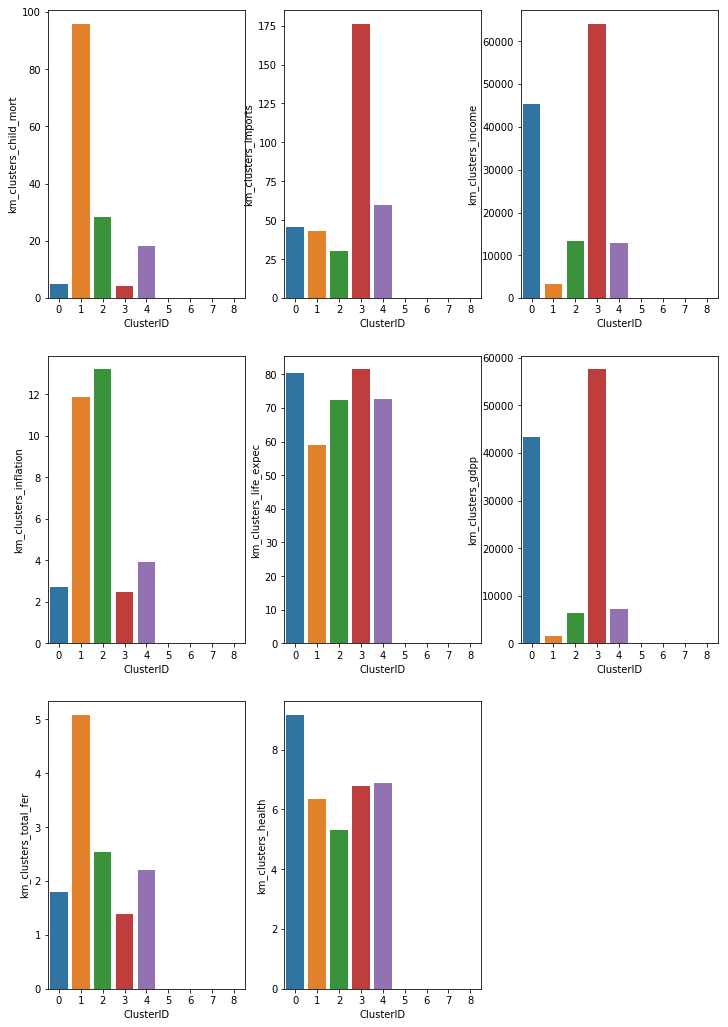

In [49]:

plt.figure(figsize=(12,18))
plt.subplot(3, 3, 1)
sns.barplot(x=df.ClusterID, y=df.km_clusters_child_mort)
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.km_clusters_exports)
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.km_clusters_imports)
plt.subplot(3, 3, 3)
sns.barplot(x=df.ClusterID, y=df.km_clusters_income)
plt.subplot(3, 3, 4)
sns.barplot(x=df.ClusterID, y=df.km_clusters_inflation)
plt.subplot(3, 3, 5)
sns.barplot(x=df.ClusterID, y=df.km_clusters_life_expec)
plt.subplot(3, 3, 6)
sns.barplot(x=df.ClusterID, y=df.km_clusters_gdpp)
plt.subplot(3, 3, 7)
sns.barplot(x=df.ClusterID, y=df.km_clusters_total_fer)
plt.subplot(3, 3, 8)
sns.barplot(x=df.ClusterID, y=df.km_clusters_health)

In [50]:
cntry_km4.loc[cntry_km4.ClusterID==2,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,ALGERIA,27.3,38.400,4.17,31.4000,12900,16.10,76.5,2.89,4460,2
5,ARGENTINA,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300,2
6,ARMENIA,18.1,20.800,4.40,45.3000,6700,7.77,73.3,1.69,3220,2
9,AZERBAIJAN,39.2,54.300,5.88,20.7000,16000,13.80,69.1,1.92,5840,2
12,BANGLADESH,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,2
19,BOLIVIA,46.6,41.200,4.84,34.3000,5410,8.78,71.6,3.20,1980,2
22,BRAZIL,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200,2
33,CHILE,8.7,37.700,7.96,31.3000,19400,8.96,79.1,1.88,12900,2
34,CHINA,15.7,26.300,5.07,22.6000,9530,6.94,74.6,1.59,4560,2
35,COLOMBIA,18.6,15.900,7.59,17.8000,10900,3.86,76.4,2.01,6250,2


## Cluster 3 is  the worst cluster among all taking everything into consideration but we need to filter further in the cluster 

In [51]:
cntry_km4.loc[(cntry_km4.child_mort>90) & (cntry_km4.exports<46) & (cntry_km4.imports>47) & (cntry_km4.gdpp<6000) &
              (cntry_km4.income <4000) & (cntry_km4.inflation <10) ,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,HAITI,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,LESOTHO,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1
112,NIGER,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
150,TOGO,90.3,40.2,7.65,57.3,1210,1.18,58.7,4.87,488,1


# Hirearchial clustering 

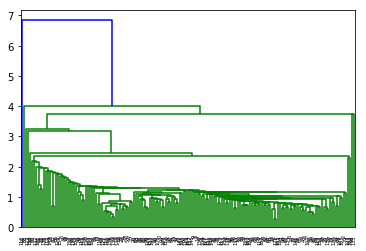

In [52]:
mergings = linkage(cntry1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

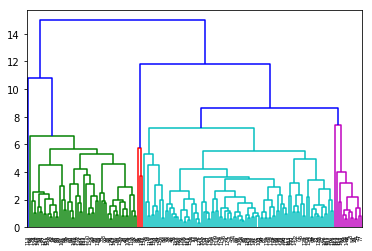

In [53]:
mergings = linkage(cntry1, method = "complete", metric='euclidean')
dendrogram(mergings, color_threshold=8)
plt.show()

In [54]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
cntry_hc = pd.concat([cntry, clusterCut], axis=1)
cntry_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [55]:
km_clusters_child_mort = 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_hc.groupby(["ClusterID"]).gdpp.mean())
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df.head()

,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,81.344444,31.520741,49.111111,3787.462963,8.926389,60.555556,1910.074074,4.697037,6.660185
1,1,18.874737,42.718726,44.488062,18582.000000,7.124495,74.478947,11941.473684,2.142000,6.410842
2,2,4.500000,39.392857,33.207143,49721.428571,2.093571,80.892857,53742.857143,1.800000,10.292143
3,3,4.133333,176.000000,156.666667,64033.333333,2.468000,81.433333,57566.666667,1.380000,6.793333
4,4,130.000000,25.300000,17.400000,5150.000000,104.000000,60.500000,2330.000000,5.840000,5.070000


In [56]:
cntry_km4.loc[(cntry_km4.child_mort>80) & (cntry_km4.exports<42) & (cntry_km4.imports>47) & (cntry_km4.gdpp<3000) &
              (cntry_km4.income <5000) & (cntry_km4.inflation <10) ,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
36,COMOROS,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769,1
66,HAITI,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,LESOTHO,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1
88,LIBERIA,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,1
112,NIGER,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
150,TOGO,90.3,40.2,7.65,57.3,1210,1.18,58.7,4.87,488,1


C:\Users\gmadhira\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


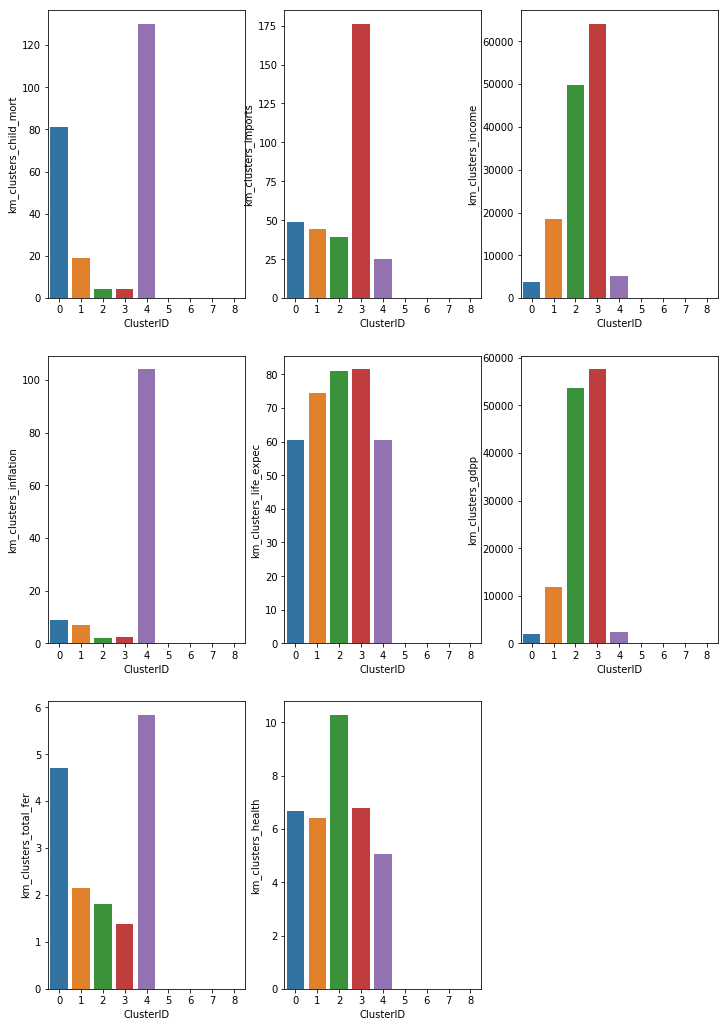

In [57]:

plt.figure(figsize=(12,18))
plt.subplot(3, 3, 1)
sns.barplot(x=df.ClusterID, y=df.km_clusters_child_mort)
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.km_clusters_exports)
plt.subplot(3, 3, 2)
sns.barplot(x=df.ClusterID, y=df.km_clusters_imports)
plt.subplot(3, 3, 3)
sns.barplot(x=df.ClusterID, y=df.km_clusters_income)
plt.subplot(3, 3, 4)
sns.barplot(x=df.ClusterID, y=df.km_clusters_inflation)
plt.subplot(3, 3, 5)
sns.barplot(x=df.ClusterID, y=df.km_clusters_life_expec)
plt.subplot(3, 3, 6)
sns.barplot(x=df.ClusterID, y=df.km_clusters_gdpp)
plt.subplot(3, 3, 7)
sns.barplot(x=df.ClusterID, y=df.km_clusters_total_fer)
plt.subplot(3, 3, 8)
sns.barplot(x=df.ClusterID, y=df.km_clusters_health)

In [58]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
cntry_hc1 = pd.concat([cntry, clusterCut], axis=1)
cntry_hc1.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','ClusterID']

In [59]:
km_clusters_child_mort = 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).exports.mean())
km_clusters_imports = 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).income.mean())
km_clusters_health= 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).health.mean())
km_clusters_inflation= 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec= 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer= 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(cntry_hc1.groupby(["ClusterID"]).gdpp.mean())
df1 = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]), km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,
km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health], axis=1)
df1.columns = ["ClusterID", "km_clusters_child_mort","km_clusters_exports","km_clusters_imports","km_clusters_income","km_clusters_inflation",
"km_clusters_life_expec","km_clusters_gdpp","km_clusters_total_fer","km_clusters_health"]
df1

,ClusterID,km_clusters_child_mort,km_clusters_exports,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_gdpp,km_clusters_total_fer,km_clusters_health
0,0,81.344444,31.520741,49.111111,3787.462963,8.926389,60.555556,1910.074074,4.697037,6.660185
1,1,18.874737,42.718726,44.488062,18582.000000,7.124495,74.478947,11941.473684,2.142000,6.410842
2,2,4.153846,37.630769,33.930769,43930.769231,1.717692,81.000000,52469.230769,1.779231,10.944615
3,3,4.133333,176.000000,156.666667,64033.333333,2.468000,81.433333,57566.666667,1.380000,6.793333
4,4,130.000000,25.300000,17.400000,5150.000000,104.000000,60.500000,2330.000000,5.840000,5.070000
5,5,9.000000,62.300000,23.800000,125000.000000,6.980000,79.500000,70300.000000,2.070000,1.810000
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
